# Decision tree

In [ ]:
print("https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial")

In [ ]:
# check ballance or imbalance of classes:
df['class'].value_counts()

In [ ]:
# missing values:
df.isnull().sum()

In [ ]:
# declare X and Y:
X = df.drop(['class'], axis=1)
y = df['class']

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# gini index:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# entropy:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
# check for overfitting between test and train data:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

# Random forest

In [ ]:
# categorical encoder:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)

In [ ]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

In [ ]:
# feature importance:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# XGBoost

In [ ]:
X = df.drop('Channel', axis=1)
y = df['Channel']

import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }   

In [ ]:
xgb_clf = XGBClassifier(**params)

In [ ]:
# validation:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [ ]:
# feature importance:
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (16, 12))
plt.show()

# Project:

In [1]:
# modules/libraries:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
df["credit.policy"].value_counts()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df["purpose"].value_counts()

In [ ]:
df["not.fully.paid"].value_counts()

In [ ]:
sns.heatmap(df.corr())

In [2]:
df = pd.get_dummies(df,
                    columns=['purpose'],
                    prefix='purpose')
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
# modules/libraries:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
# setup data:
X = df.drop(["not.fully.paid"], axis = 1)
y = df[["not.fully.paid"]]

# split data:
X_train, X_test, y_train, y_test = (
    train_test_split(X, y, test_size = 0.3, random_state = 42))

In [ ]:
# scale/normalize the data X_train and X_test:
scaler = StandardScaler()
X_norm_train = scaler.fit_transform(X_train)
X_norm_test = scaler.fit_transform(X_test)

In [ ]:
# model = DecisionTreeClassifier()
model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 42)
# model = DecisionTreeClassifier(criterion='entropy', max_depth = 5, random_state=0)

In [ ]:
# fit:
model.fit(X_train,y_train)

In [ ]:
# predict:
y_pred = model.predict(X_test)

In [ ]:
# final score:
score = model.score(X_test, y_test)
print("Accuracy on training set:", score)

In [ ]:
# classification report:
print(classification_report(y_test, y_pred))

In [ ]:
# matrix:
print(confusion_matrix(y_test, y_pred))

In [ ]:
# 84%

# Random forest approach

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)

In [ ]:
# predict:
y_pred = rfc.predict(X_train)

In [ ]:
# final score:
score = rfc.score(X_test, y_test)
print("Accuracy on training set:", score)

In [ ]:
# warning for class report!

In [ ]:
# no need to use scaling for this!

## XGBoost:

In [3]:
import xgboost as xgb

# setup data:
X = df.drop(["not.fully.paid"], axis = 1)
y = df[["not.fully.paid"]]
# define data_dmatrix
data_dmatrix = xgb.DMatrix(data = X, label = y)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [5]:
from xgboost import XGBClassifier

# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 3,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }

In [6]:
xgb_clf = XGBClassifier(**params)

In [7]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [8]:
y_pred = xgb_clf.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.8337


In [16]:
# matrix:
print(confusion_matrix(y_test, y_pred))

[[2372   34]
 [ 444   24]]


In [17]:
# classification report:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2406
           1       0.41      0.05      0.09       468

    accuracy                           0.83      2874
   macro avg       0.63      0.52      0.50      2874
weighted avg       0.77      0.83      0.78      2874



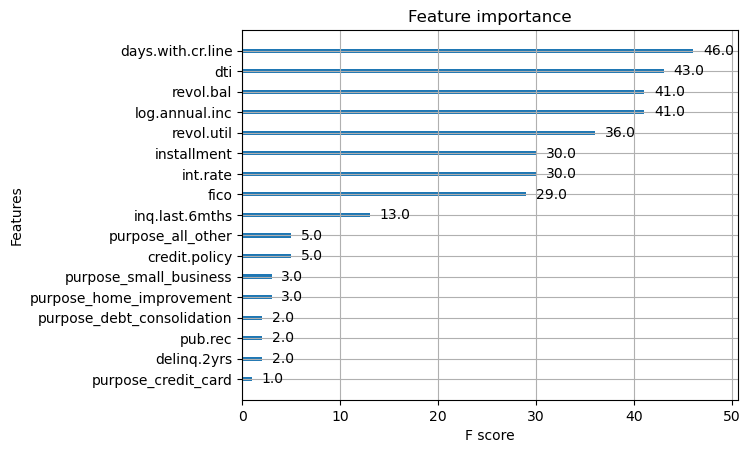

<Figure size 1600x1200 with 0 Axes>

In [10]:
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (16, 12))
plt.show()

In [11]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [12]:
# classification report:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2406
           1       0.41      0.05      0.09       468

    accuracy                           0.83      2874
   macro avg       0.63      0.52      0.50      2874
weighted avg       0.77      0.83      0.78      2874

